# Student Name: Kanav Jamwal
# Student ID: 29554209

## Section A. Model Complexity and Model Selection

## Question2.

In [1]:
# importing library.
library(reshape2)
library(ggplot2)
library(corrplot)
options(warn=-1)

corrplot 0.84 loaded


In [2]:
# loading data set.
train.data.csv<-read.csv("Task1A_train.csv")

In [3]:
train.data <- train.data.csv[1]
train.label <- train.data.csv[,2]
head(train.data)

x1
1960.0
1960.5
1961.0
1961.5
1962.0
1962.5


In [4]:
# define a function that calculates the majority votes (or mode!)
majority <- function(x) {
   return(mean(x))
}

# KNN function (distance should be one of euclidean, maximum, manhattan, canberra, binary or minkowski)
knn <- function(train.data, train.label, test.data, K=3, distance = 'euclidean'){
        
    # Number of sample in train
    train.len <- nrow(train.data)
    # Number of sample in test
    test.len <- nrow(test.data)
    dist <- as.matrix(dist(rbind(test.data, train.data), method= distance))[1:test.len, (test.len+1):(test.len+train.len)]
    test.label <- c()
    for (i in 1:test.len){
        nn <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
        test.label[i]<- (majority(train.label[nn]))
    }
    return (test.label)
}

### 1. Implement the L-fold cross validation for the KNN regressor.

In [5]:
cv <- function(train.data, train.label, numFold = 10) {
    
    K<-15
    #Creating 10 equally size distinct fold
    folds <- cut(seq(1,nrow(train.data)),breaks=numFold,labels=FALSE)
    
    
    #Dataset to store errors
    error_list <- data.frame('folds' = 1:numFold, 'error' = rep(0, numFold*K))
    
    for(k in 1:K){
    #Perform 10 fold cross validation
        for (i in 1:numFold){
            #Segementing data
            indexs <- which(folds == i)
            index <- (k-1)*numFold+i
            
            test.fold <- data.frame("value" = train.data[indexs,])
            train.fold <- data.frame("value" = train.data[-indexs,])
    
            test.label.fold <- train.label[indexs]
            train.label.fold <- train.label[-indexs]
            
            error_list[index,'K']=k
            error_list[index,'folds']=i
            error_list[index, 'error'] = sum((knn(train.fold,train.label.fold, test.fold, K=k) - test.label.fold)^2)/nrow(train.fold)
        }
    }
    return (error_list)
}

In [6]:
error.list<- cv(train.data, train.label, 10)
my_data <- error.list[, c(3, 1, 2)]
head(error.list)

folds,error,K
1,0.005002703,1
2,0.005581579,1
3,0.018107895,1
4,0.035502632,1
5,0.074818421,1
6,0.053076316,1


In [7]:
avg.error = data.frame('K'= 1:15, 'mean' = aggregate(my_data[, 3], list(my_data$K), mean)[,2], 'sd' = aggregate(my_data[, 3], list(my_data$K), sd)[,2])
head(avg.error)

K,mean,sd
1,0.1895158,0.4096712
2,0.2784054,0.7449506
3,0.3295463,0.8807557
4,0.3730630,1.0862902
5,0.4303285,1.2648830
6,0.4594197,1.3877770


### 2.Plot the average error numbers versus 1/K

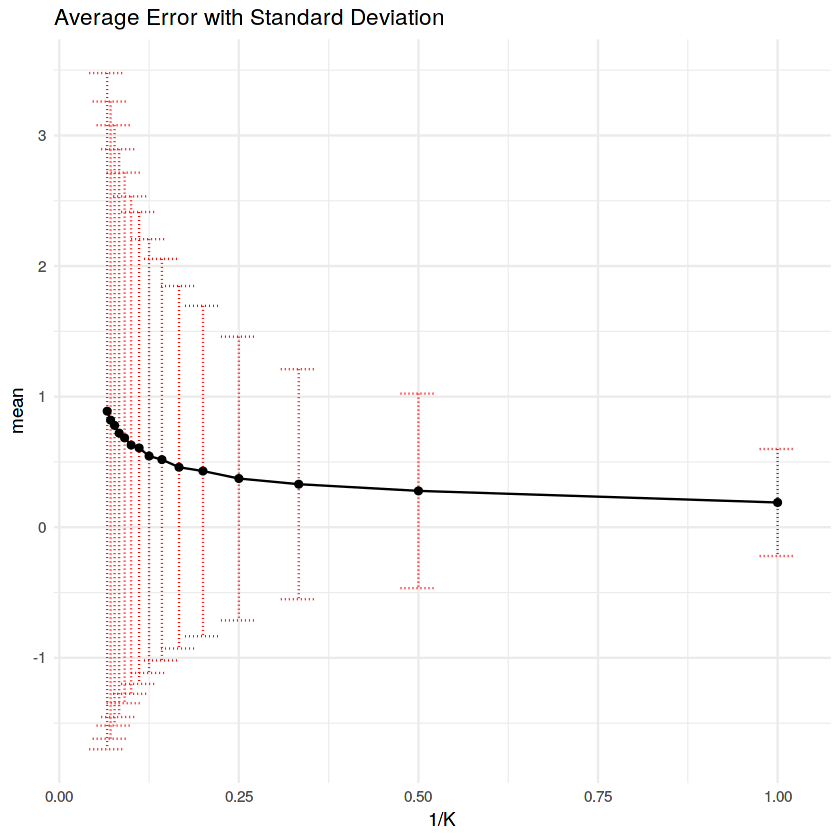

In [10]:
ggplot(avg.error, aes(x=1/K, y=mean)) + 
     geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=.05, linetype="dotted", color = 'red') +
     geom_line() +
    geom_point() + 
    scale_color_discrete(guide = guide_legend(title = NULL)) + theme_minimal() +
       ggtitle("Average Error with Standard Deviation")

###  3. The optimum value of K

1. **The optimum value of 1/k is 0.5 as the average error is almost converging or K=2.**